NAMA KELOMPOK :

1. Abhinaya Aghni Fadhila_10124004
2. Hasbiallah Alfarizi_10124559
3. Zahrah Syifa Zain_11124407




# Project Guideline

Hi teman-teman! Silakan menggunakan template notebook ini untuk mengerjakan projectmu.

<br>

**Informasi tambahan,**
1. Copy notebook ini untuk mulai mengerjakan Projectmu.
2. Kamu bebas untuk menambahkan cell pada notebook.

## Data Understanding

Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Memasukkan library yang akan kamu gunakan

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


Mengambil file .csv dari Google Drive kamu.

In [22]:
df = pd.read_csv('/content/drive/MyDrive/DATA SET/housing_data.csv')

In [23]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


Cek Duplikasi

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
binary_cols = ['mainroad', 'guestroom', 'hotwaterheating', 'airconditioning', 'basement', 'prefarea']

for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)


In [26]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

print("\nKolom 'furnishingstatus' sudah di-one-hot encoded.")


Kolom 'furnishingstatus' sudah di-one-hot encoded.


## Data Cleaning

Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

In [17]:
print("Jumlah nilai yang hilang pada setiap kolom:")
print(df.isnull().sum())

Jumlah nilai yang hilang pada setiap kolom:
price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


In [18]:
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Outlier pada kolom '{col}': {len(outliers)} data")

Outlier pada kolom 'price': 15 data
Outlier pada kolom 'area': 12 data
Outlier pada kolom 'bedrooms': 12 data
Outlier pada kolom 'bathrooms': 1 data
Outlier pada kolom 'stories': 41 data
Outlier pada kolom 'parking': 12 data


## Exploratory Data Analysis

Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

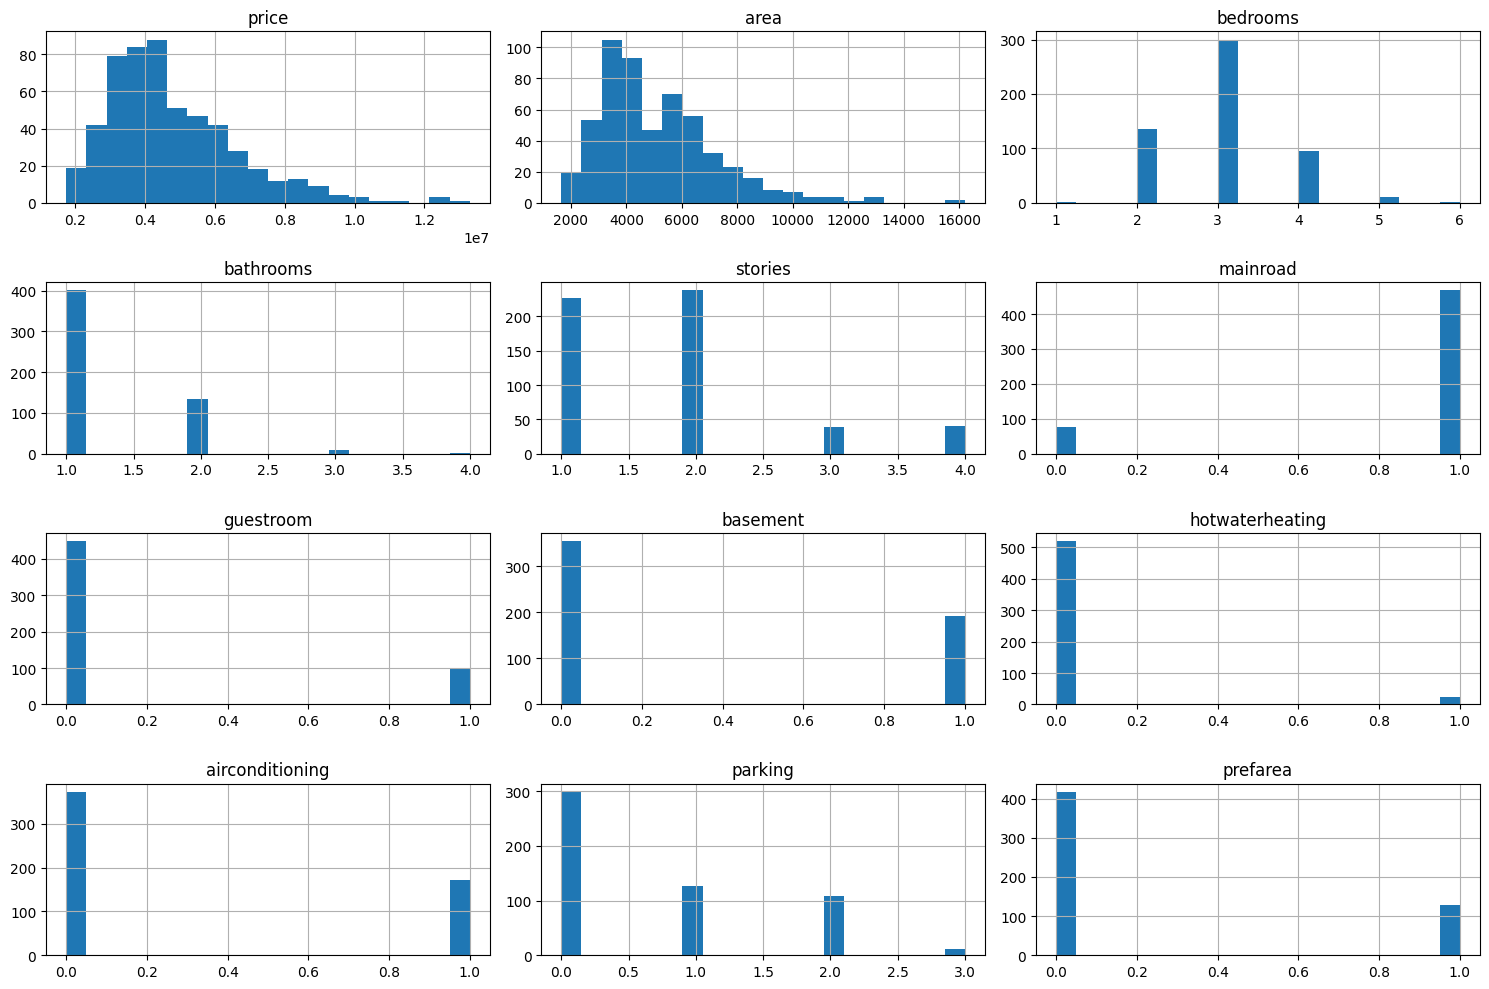

In [27]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

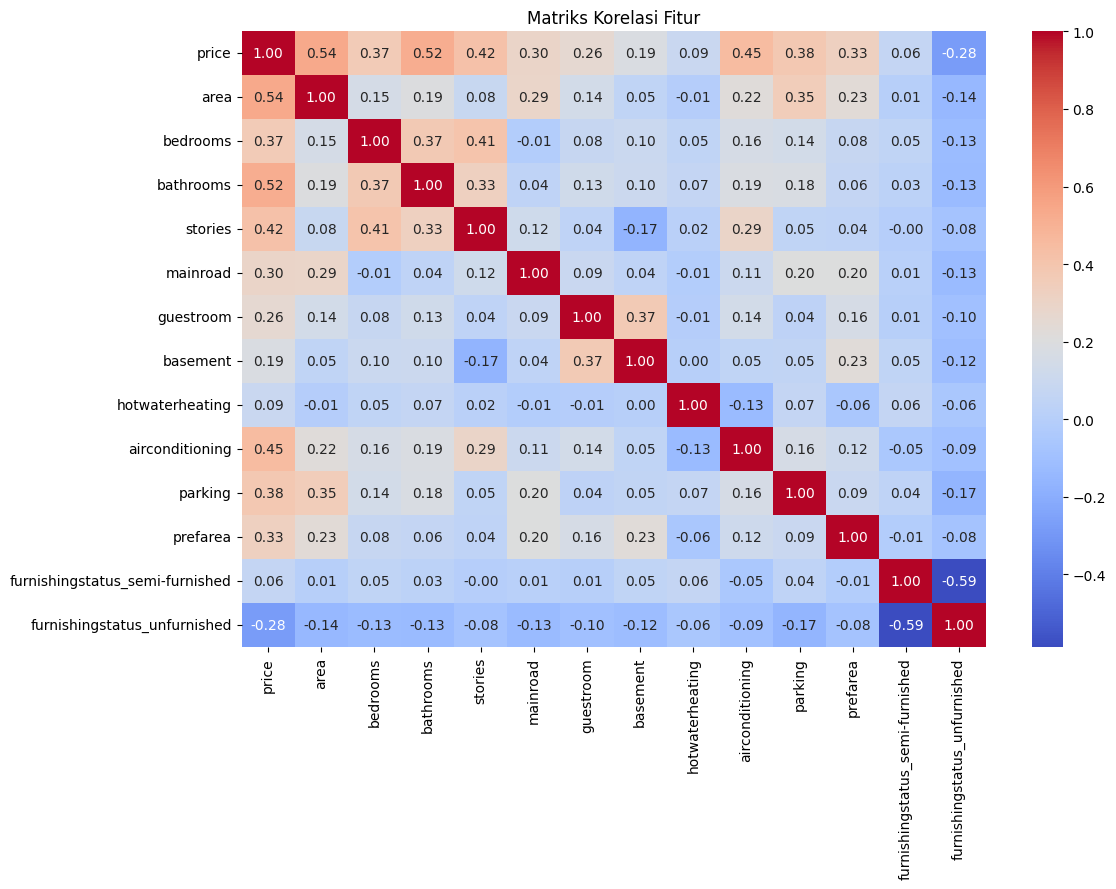

In [30]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriks Korelasi Fitur')
plt.show()


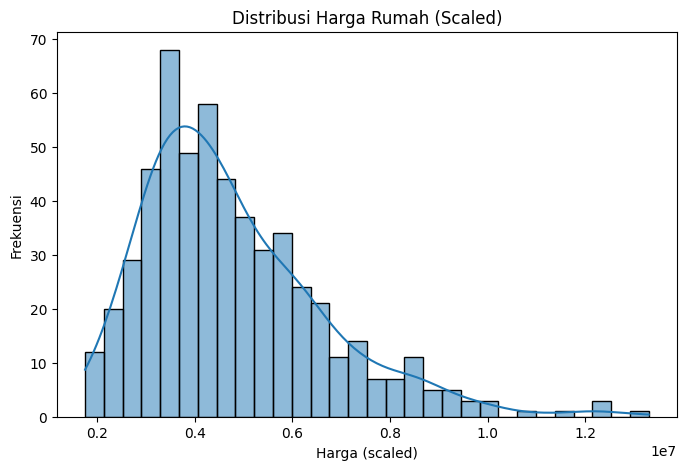

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribusi Harga Rumah (Scaled)')
plt.xlabel('Harga (scaled)')
plt.ylabel('Frekuensi')
plt.show()

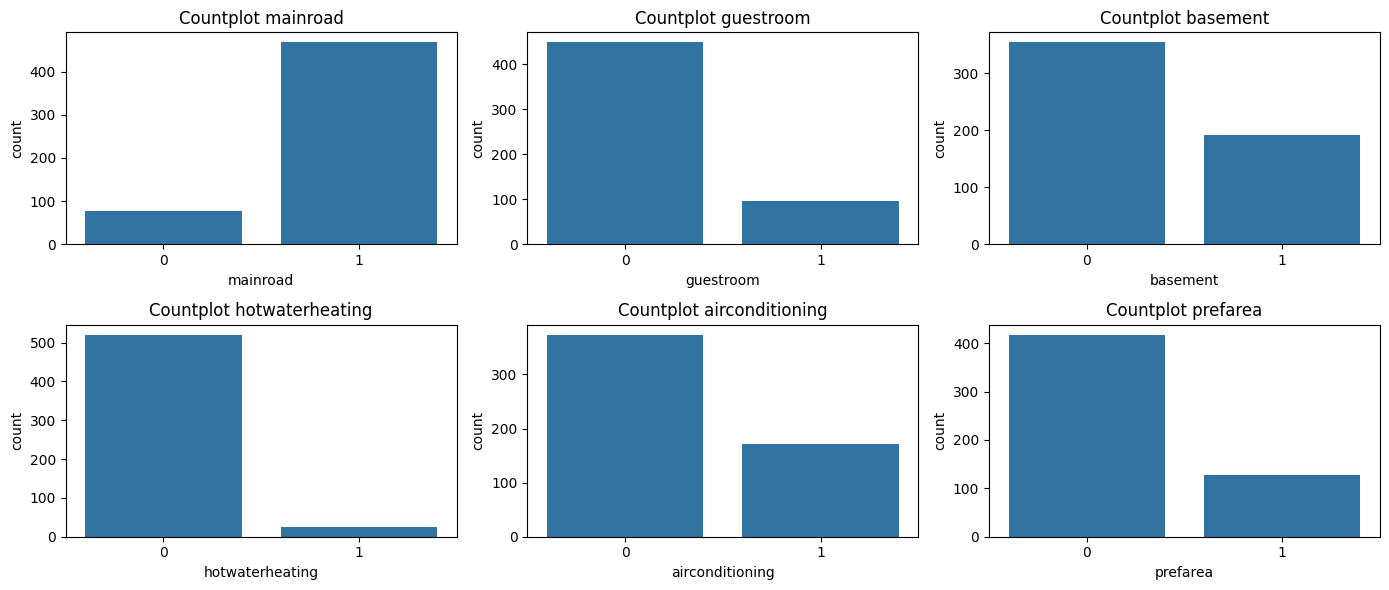

In [33]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
plt.figure(figsize=(14,6))
for i, col in enumerate(binary_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[col])
    plt.title(f'Countplot {col}')
plt.tight_layout()
plt.show()

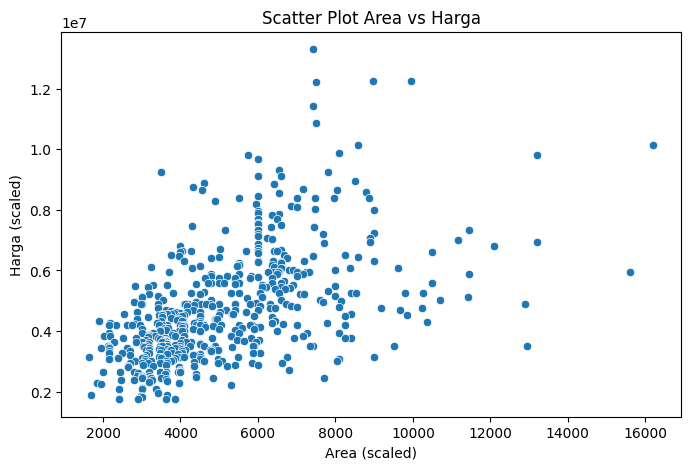

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['area'], y=df['price'])
plt.title('Scatter Plot Area vs Harga')
plt.xlabel('Area (scaled)')
plt.ylabel('Harga (scaled)')
plt.show()



## Data Preparation

Memisahkan data training dan testing

In [9]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mengecek dimensinya

In [10]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')


Shape of X_train: (436, 13)
Shape of X_test: (109, 13)
Shape of y_train: (436,)
Shape of y_test: (109,)


## Model Building

Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

In [11]:
model = LinearRegression()


In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
print(f'Koefisien model: {model.coef_}')
print(f'Intersep model: {model.intercept_}')


Koefisien model: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  3.67919948e+05  2.31610037e+05  3.90251176e+05  6.84649885e+05
  7.91426736e+05  2.24841913e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
Intersep model: 260032.35760741122


In [14]:
y_pred = model.predict(X_test)

## Evaluation

Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

R^2 Score: 0.6529
Mean Absolute Error (MAE): 970043.4039
Mean Squared Error (MSE): 1754318687330.6633
Root Mean Squared Error (RMSE): 1324506.9601


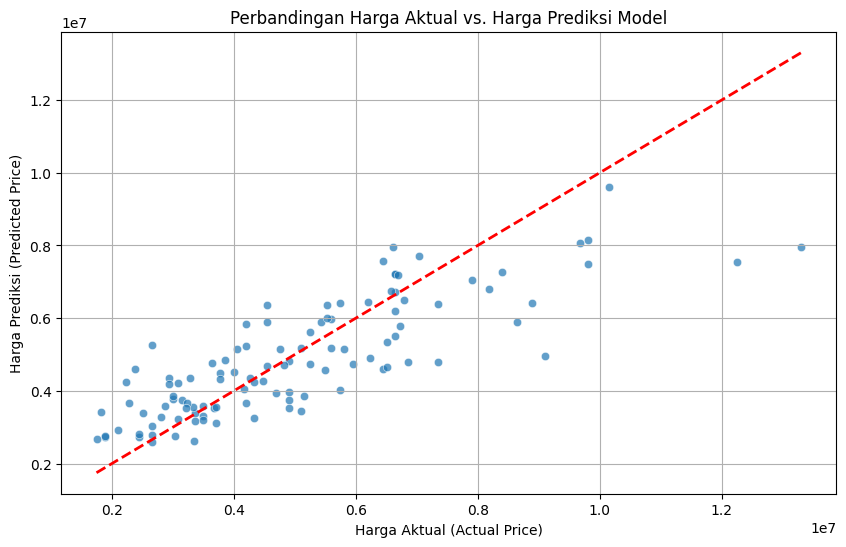

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Harga Aktual (Actual Price)')
plt.ylabel('Harga Prediksi (Predicted Price)')
plt.title('Perbandingan Harga Aktual vs. Harga Prediksi Model')
plt.grid(True)
plt.show()
